<b><font color="red" size="6"> ch13.데이터 시각화  </font></b>

# 1절. 시각화 개요
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능과 groupby 기능을 추가한 라이브러리

# 2절. matplotlib
- https://pypi.org/project/matplotlib/ : matplotlib doc
- https://matplotlib.org/stable/api/index.html : api reference

## 2.1 패키지 import 및 기본설정

In [1]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [2]:
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt 

In [96]:
# % 주피터노트북에서 사용가능한 매직명령어
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
# 한글설정
# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='ignore') # 경고메세지 안보이게
warnings.filterwarnings(action='default') # 경고메세지 보이게

## 2.2 그래프 그리기
- matplotlib으로 그래프를 그리기 위한 단계 
    1) 데이터 준비<br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장 <br>

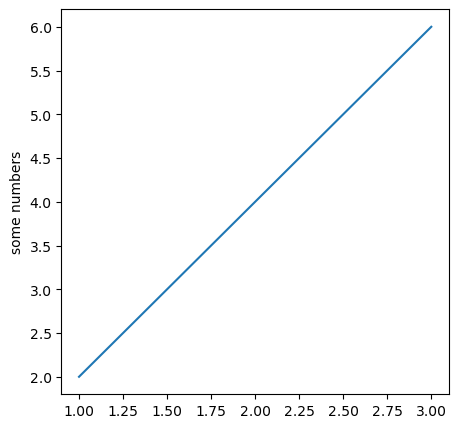

In [4]:
plt.figure(figsize=(5,5)) # 2) 그래프 객체 생성. 사이즈는 인치
plt.plot([1,2,3],[2,4,6]) # 3) 그래프 함수 / y값이 동일하면 y값 생략가능
plt.ylabel('some numbers') # 4) 그래프 커스터마이징
plt.show() # 5) 그래프 출력

## 2.3 그래프 영역 나누기
### 1) subplot() 함수로 서브플롯 추가

In [6]:
import numpy as np
x = np.arange(0, 10, 0.01)
x.shape

(1000,)

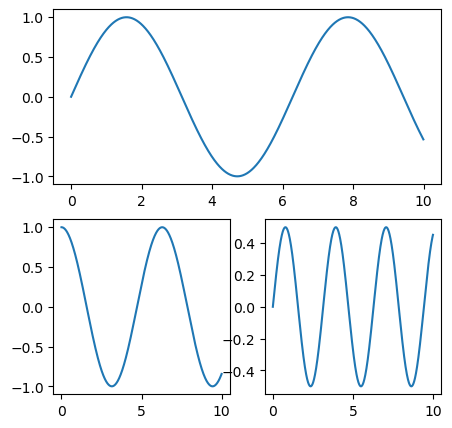

In [16]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1) # 2행 1열의 subplot에서 1번째 subplot에 다음과 같이 그래프 그릴거야
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) # 2행 2열의 subplot에서 3번째 subplot에 다음과 같이 그래프 그릴거야
# plt.subplot(223) 위와 같은 코드
plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4) # 2행 2열의 subplot에서 4번째 subplot에 다음과 같이 그래프 그릴거야
plt.plot(x, np.sin(x)*np.cos(x))
plt.show()

### 2) subplots() 함수로 서브플롯 추가
- plot함수에서 색상이나 스타일을 조정 : https://wikidocs.net/92085

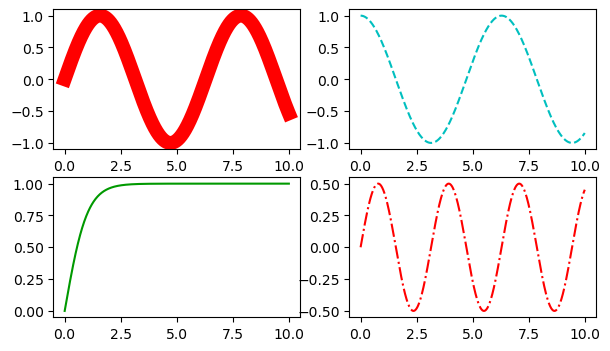

In [41]:
# 2행 2열 서브플롯
fig, axes =plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), 'r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') # color='c', linestyle='--' (대시라인) : (점선)
axes[1,0].plot(x, np.tanh(x), color='#009900') # rgb값으로 넣어도 사용 가능
# axes[1,0].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ko:') # k=black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')

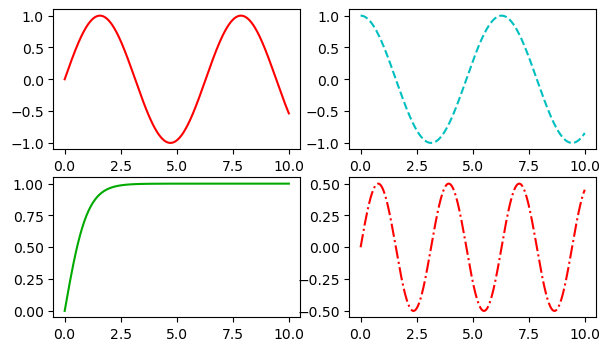

In [54]:
# 2행 2열 subplots (for문 사용)
func_list = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt_list = ['r','c--','#00AA00','r-.']
fig, axes = plt.subplots(2,2, figsize=(7,4))
# list(enumerate(axes.flat))
for idx, ax in enumerate(axes.flat):
    ax.plot(x, func_list[idx](x), fmt_list[idx])

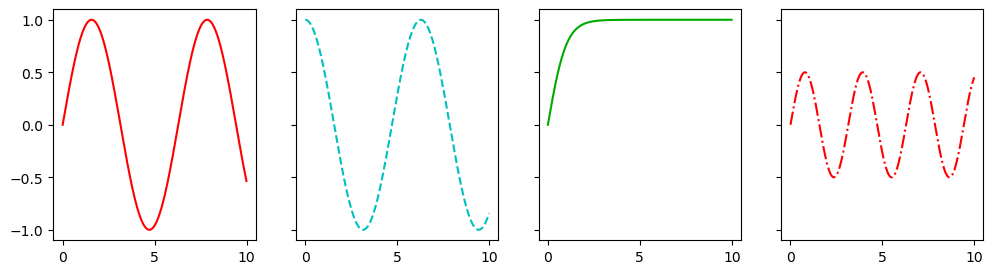

In [59]:
# 1행 4열 서브플롯
fig, axes = plt.subplots(ncols=4, figsize=(12,3), sharey=True)  # y축 공유
for i, ax in enumerate(axes):
    ax.plot(x, func_list[i](x), fmt_list[i])

## 2.4 다양한 그래프 그리기
### 1) pyplot 함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 2) matplotlib.pyplot.plot() : 선그래프


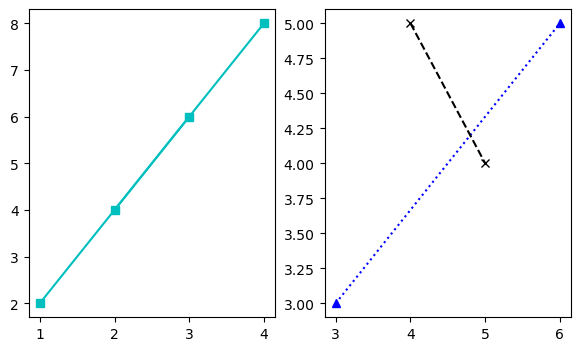

In [66]:
fig, axes = plt.subplots(ncols=2, figsize=(7,4)) # 1행 2열
axes[0].plot([[1, 2],[3, 4]],
             [[2, 4],[6, 8]], 'cs-') # color='c': cyan , marker='s':사각마커, linestyle='-' : 실선
axes[1].plot([3,6],[3,5], 'b^:') # b(blue), ^(마커) :(점선)
axes[1].plot([4,5],[5,4], 'kx--') # k(black), x(마커), --(대시드점선)

### 3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt) <br>
- df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None, xlim, ylim,.....)<br>
    * kind : line(기본값), scatter(점도표), bar, barh, density, pie ... <br>
    * figsize : tuple(인치단위)<br>
    * xlim, ylim : list/tuple

In [67]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
127,6.1,3.0,4.9,1.8,virginica


https://stackoverflow.com/questions/30490740/move-legendoutside-figure-in-seaborn-tsplot : 범례사용

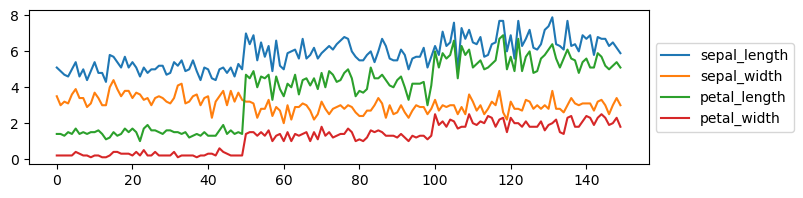

In [74]:
g = iris.plot(figsize=(8,2))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### colormap 색상
https://ko.wikipedia.org/wiki/상자_수염_그림 <br>
https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)


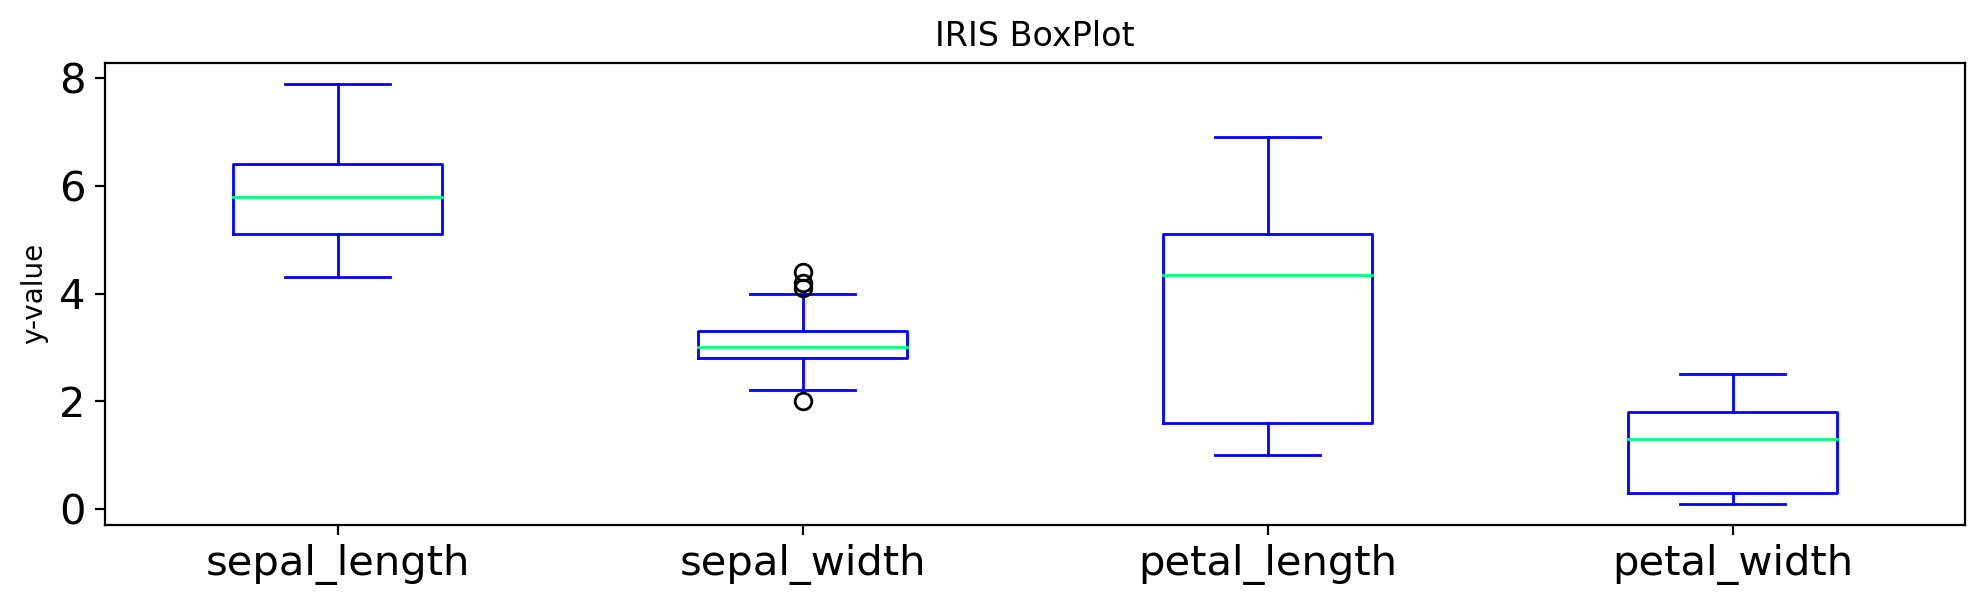

In [104]:
iris.plot(kind='box', figsize=(12,3), title='IRIS BoxPlot', ylabel='y-value', fontsize=15, colormap='winter')
plt.show()

In [97]:
iris.quantile(q=[0, 0.25, 0.5, 0.75, 1])

C:\Users\201-23\AppData\Local\Temp\ipykernel_1984\497938153.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.quantile(q=[0, 0.25, 0.5, 0.75, 1])


,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [99]:
iris.corr()

C:\Users\201-23\AppData\Local\Temp\ipykernel_1984\2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


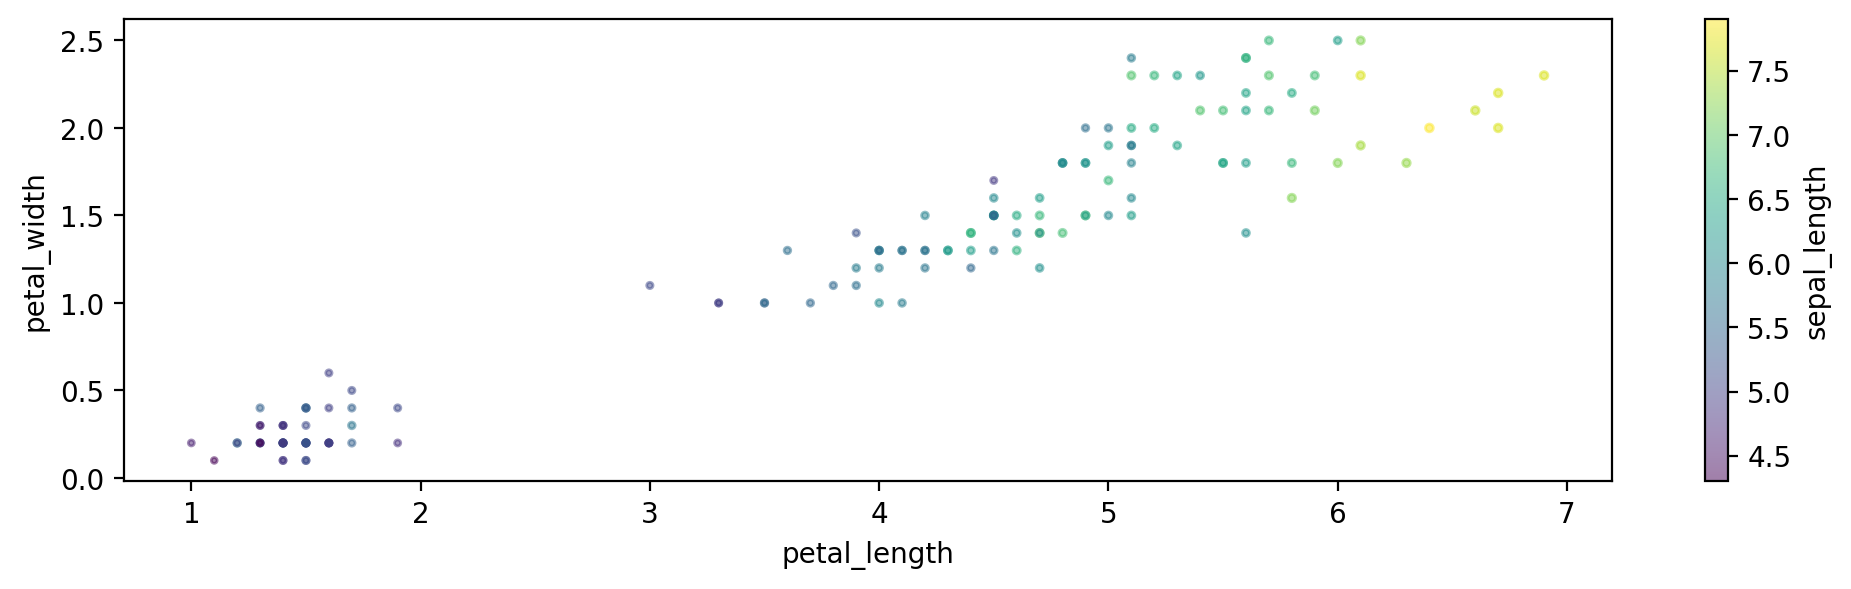

In [112]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3), s='sepal_length', # s:점의크기 c:색상
         c='sepal_length',
         alpha=.5) # alpha : 투명도 
plt.show()

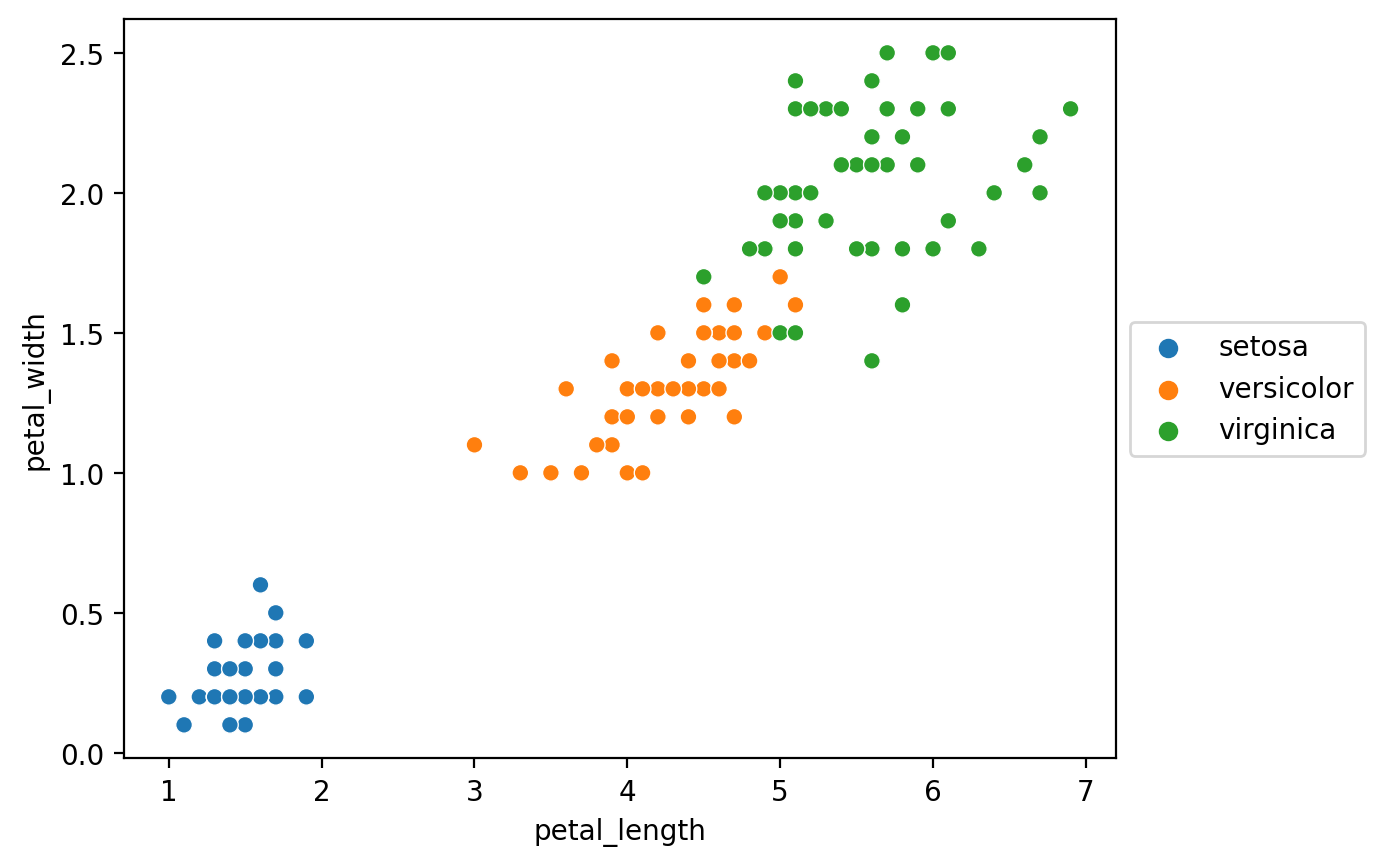

In [117]:
import seaborn as sns
g = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,"Axes(0.125,0.653529;0.168478x0.226471)","Axes(0.327174,0.653529;0.168478x0.226471)","Axes(0.529348,0.653529;0.168478x0.226471)","Axes(0.731522,0.653529;0.168478x0.226471)"
versicolor,"Axes(0.125,0.653529;0.168478x0.226471)","Axes(0.327174,0.653529;0.168478x0.226471)","Axes(0.529348,0.653529;0.168478x0.226471)","Axes(0.731522,0.653529;0.168478x0.226471)"
virginica,"Axes(0.125,0.653529;0.168478x0.226471)","Axes(0.327174,0.653529;0.168478x0.226471)","Axes(0.529348,0.653529;0.168478x0.226471)","Axes(0.731522,0.653529;0.168478x0.226471)"


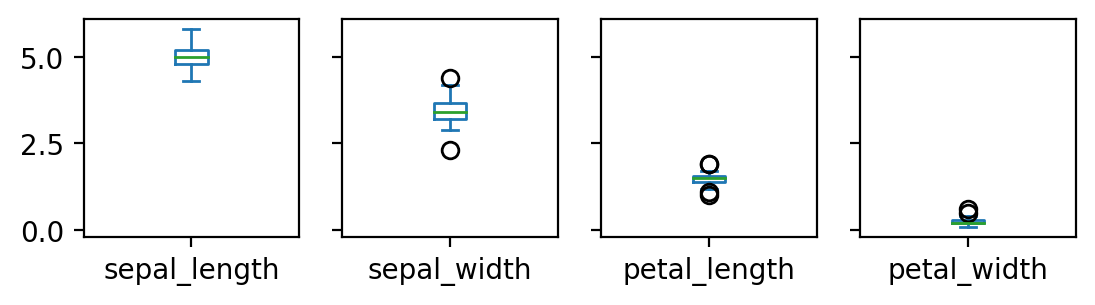

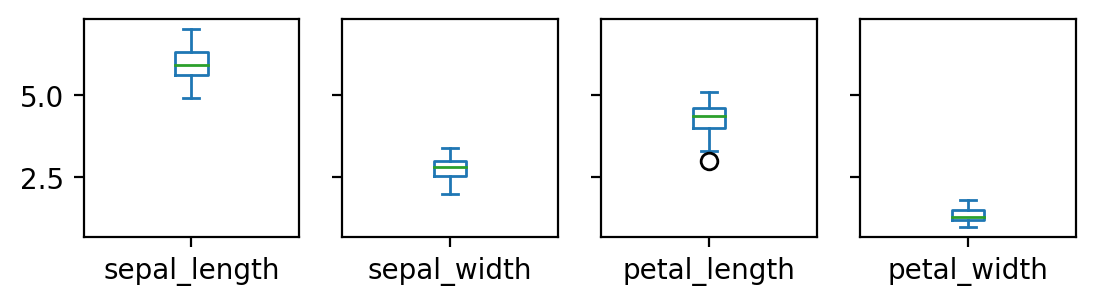

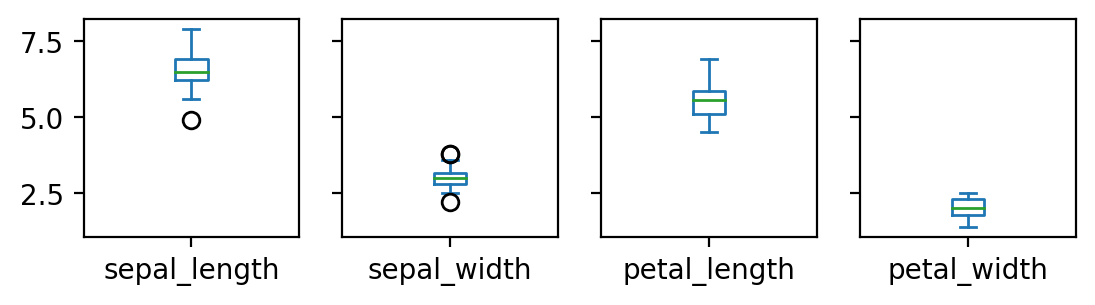

In [122]:
# 종별 boxplot
iris.groupby('species').plot(kind='box', subplots=True, layout=(3, 4), sharey=True) #  sharey=True y축 공유

## 4) plt.scatter(): 산점도

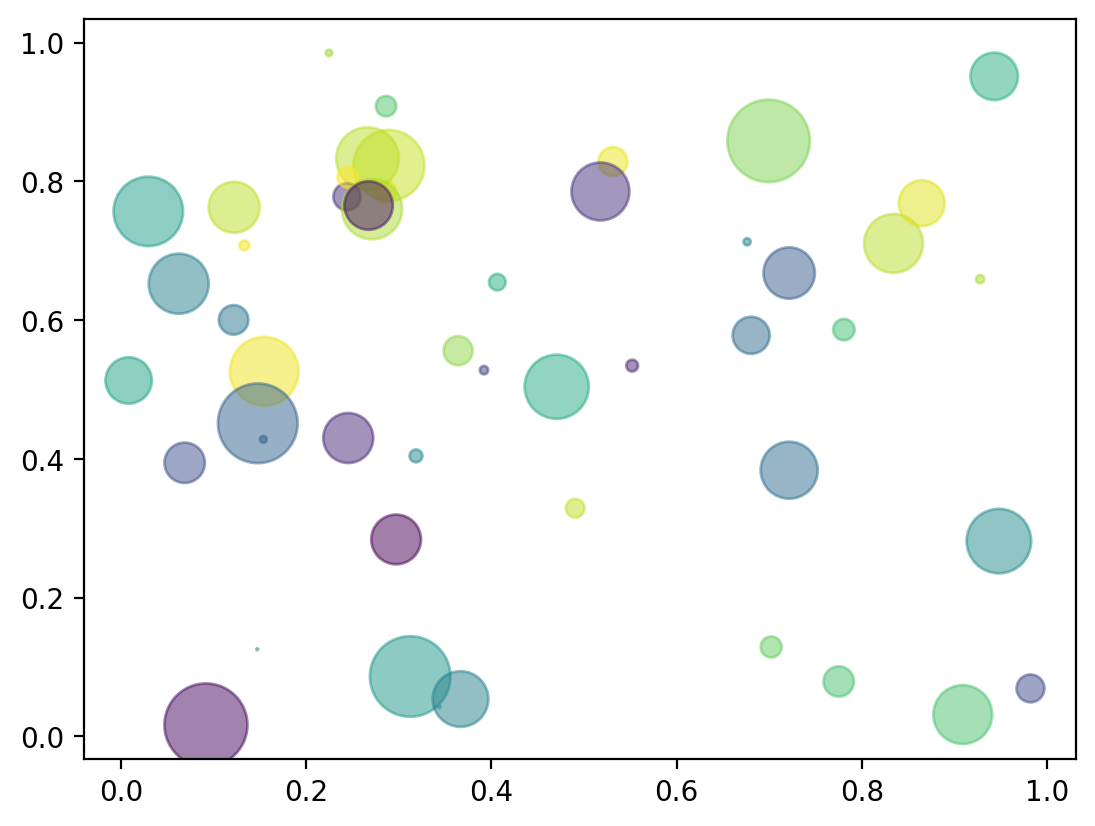

In [126]:
x = np.random.rand(50) # 균등분표의 1차원 난수 50개 발생(배열)
y = np.random.rand(50) 
colors = np.random.rand(50)
area = (np.random.rand(50)*30)**2
plt.scatter(x, y, s=area, # 점의크기
          c=colors,
           alpha=.5 # 투명도(투명0~1불투명)
           )
plt.show()

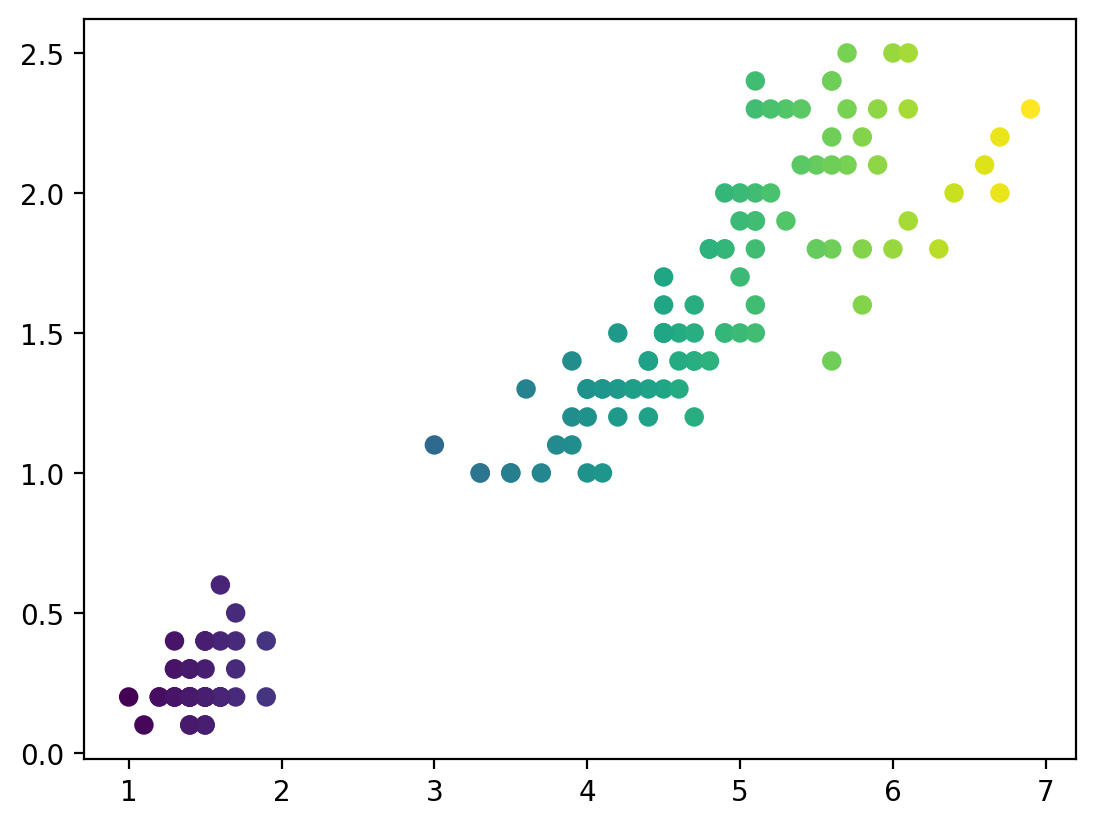

In [128]:
plt.scatter(x=iris.petal_length, y=iris.petal_width, c=iris.petal_length*20)
plt.show()

## 2.5 그외 그래프 그리기
### 1) fill(), fill_between(), scatter()
### 2) bar(), barh(), axvline(), axhline()
### 3) hist(히스토그램), boxplot(분포를 모름), violinplot()

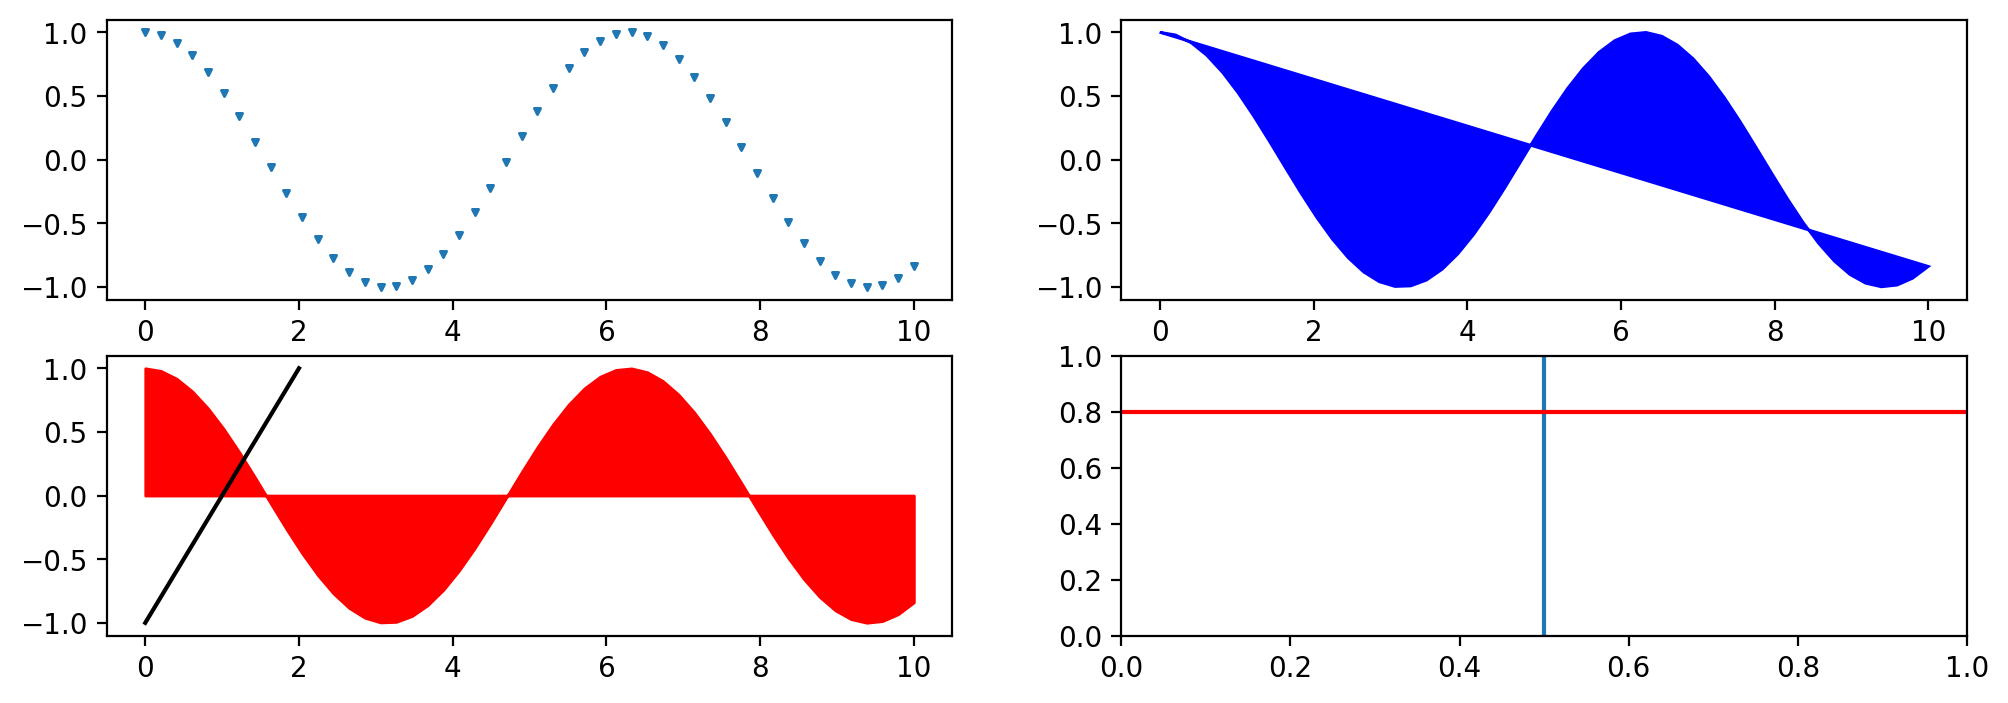

In [144]:
x = np.linspace(0, 10) # 0부터 10까지 일정한 간격으로 50(기본값)개 수 추출
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,4))
axes[0,0].scatter(x, y, s=5, marker='v')
axes[0,1].fill(x, y, c='b')
axes[1,0].fill_between(x, y, color='r')
axes[1,0].plot([0,2],[-1, 1], 'k')
axes[1,1].axvline(0.5)
axes[1,1].axhline(0.8, c='r')

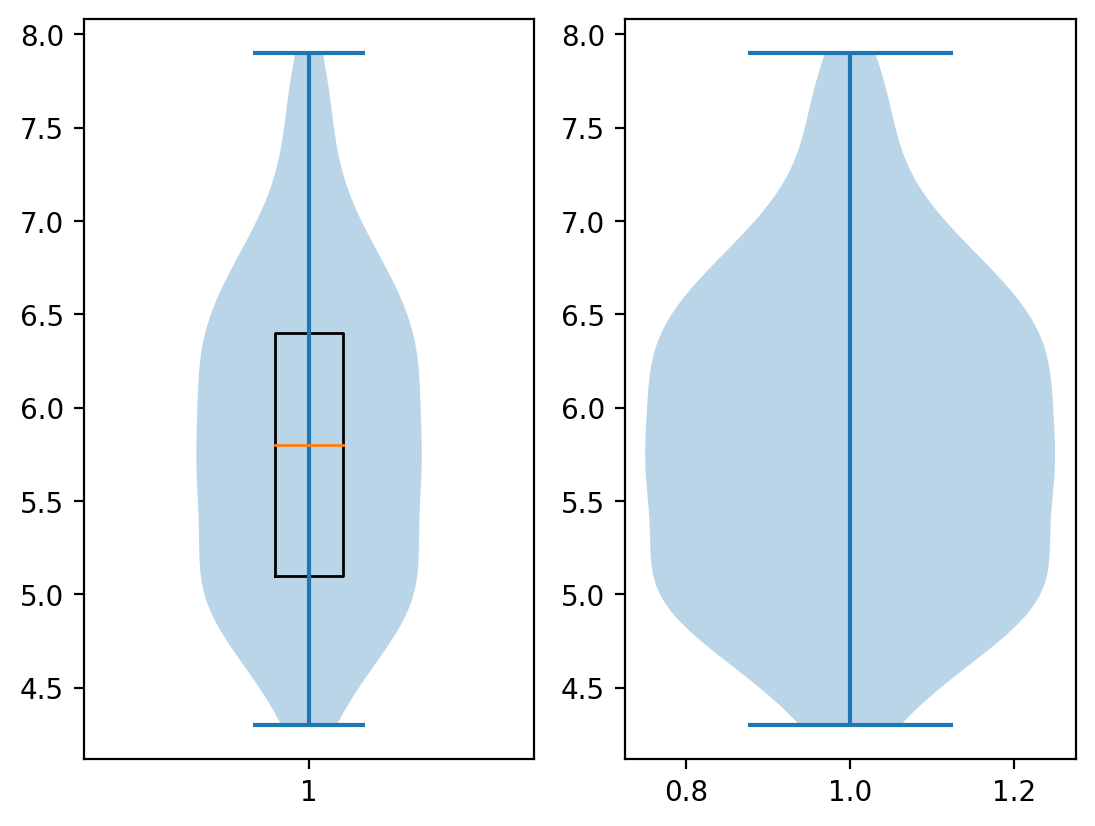

In [151]:
# boxplot vs violinplot
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length) # 분포까지 알수있음 
axes[1].violinplot(iris.sepal_length) 
plt.show()